23654


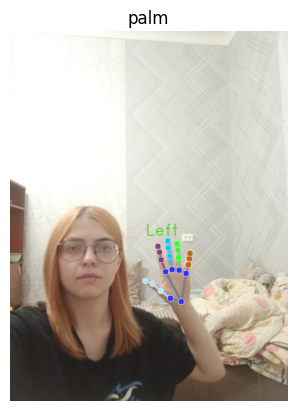

{'bboxes': [[0.46853708, 0.55785997, 0.19798503, 0.18762514]], 'user_id': 'a2dc22a2240ef636e44e319898fcadbc03a7b79f05bd3140ccf7052c98eb6d09', 'labels': ['palm']}
[7, 0.6156426668167114, 0.7315001487731934, 1.8598255735469138e-07, 0.5763837099075317, 0.7221879959106445, -0.018928563222289085, 0.5414366722106934, 0.7013881206512451, -0.030237166211009026, 0.5129806995391846, 0.6832570433616638, -0.040330834686756134, 0.4864755868911743, 0.6763023138046265, -0.050038158893585205, 0.5590415596961975, 0.6508520841598511, -0.01492026075720787, 0.5441527962684631, 0.6185301542282104, -0.027513714507222176, 0.5372713804244995, 0.5983189940452576, -0.039277754724025726, 0.5324960947036743, 0.5815162658691406, -0.04827357083559036, 0.5829540491104126, 0.6444901823997498, -0.015595585107803345, 0.5748083591461182, 0.6088314652442932, -0.025588873773813248, 0.5700509548187256, 0.5861044526100159, -0.0347936674952507, 0.5666506290435791, 0.5671141147613525, -0.04179094731807709, 0.6077440977096558,

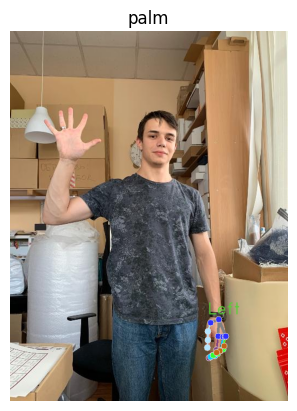

{'bboxes': [[0.12013696, 0.20216219, 0.2120432, 0.15282551], [0.69656796, 0.76325126, 0.08684519, 0.13198688]], 'user_id': 'ed74860e4eb5a86fce37850009d65a779d44486f835e2e2385587df9744ea4de', 'labels': ['palm', 'no_gesture']}
[7]
23652


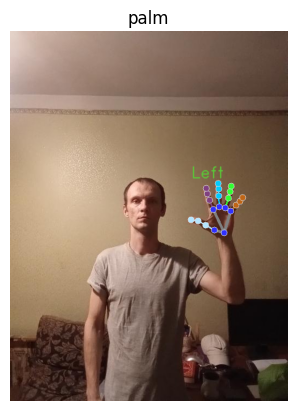

{'bboxes': [[0.6365764, 0.40052205, 0.21502228, 0.15904304]], 'user_id': '19da28f1dfbea65551994da308f9293dc396cc65b251642c6d202d986df0fa3d', 'labels': ['palm']}
[7, 0.7713301181793213, 0.54581218957901, 2.1637563918375236e-07, 0.7363216876983643, 0.5385705828666687, -0.01845921389758587, 0.7042220830917358, 0.5243210196495056, -0.03059464506804943, 0.6764646768569946, 0.5129068493843079, -0.041250213980674744, 0.6517688035964966, 0.5105075240135193, -0.05236976966261864, 0.7306516766548157, 0.48256954550743103, -0.020788660272955894, 0.7169610261917114, 0.4572112560272217, -0.031263317912817, 0.70961993932724, 0.4402688443660736, -0.04042357578873634, 0.7051339745521545, 0.42598778009414673, -0.047975003719329834, 0.7535103559494019, 0.4756775200366974, -0.02039506658911705, 0.7512341141700745, 0.44528165459632874, -0.028486035764217377, 0.7500726580619812, 0.4265804588794708, -0.03546331822872162, 0.749350905418396, 0.4114384055137634, -0.04158139228820801, 0.7752281427383423, 0.47828

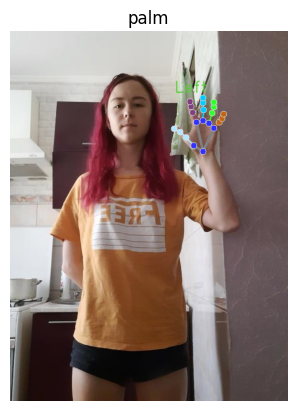

{'bboxes': [[0.57821988, 0.17373612, 0.20263379, 0.15933809]], 'user_id': '8472c60bdb4507fc4c5c706584be6defde4574ef909909362bbefd1c23a795a9', 'labels': ['palm']}
[7, 0.6936995983123779, 0.3255549371242523, 7.104178934014271e-08, 0.6619631052017212, 0.3099468946456909, -0.013193477876484394, 0.6346319317817688, 0.2881651818752289, -0.022690750658512115, 0.6116873621940613, 0.27269378304481506, -0.03237933665513992, 0.5898486375808716, 0.2641037404537201, -0.0427858829498291, 0.6702271103858948, 0.246749609708786, -0.010004417970776558, 0.658123791217804, 0.22008131444454193, -0.01897498406469822, 0.6520921587944031, 0.20387257635593414, -0.028485756367444992, 0.6480491161346436, 0.19038799405097961, -0.03637857362627983, 0.6950069069862366, 0.24300090968608856, -0.012163530103862286, 0.6958327293395996, 0.21242676675319672, -0.018029894679784775, 0.6950171589851379, 0.19454792141914368, -0.024532277137041092, 0.6934051513671875, 0.18131819367408752, -0.030816972255706787, 0.716715395450

In [6]:
import csv
import json
import os
import random
import matplotlib.pyplot as plt

import mediapipe as mp

LANDMARKER_MODEL_PATH = 'models/hand_landmarker.task'
CSV_DATASET_PATH = 'datasets/HandLandmarks.csv'
IMAGE_DATASET_DIR = "E:/MyDatasets/hagrid_dataset_512"
ANNOTATIONS_DIR = "E:/MyDatasets/hagrid_dataset_annotations/train"
LABELS = ['call', 'dislike', 'fist', 'like', 'mute', 'ok', 'one', 'palm', 'peace', 'rock', 'stop', 'stop_inverted']

BaseOptions = mp.tasks.BaseOptions
HandLandmarker = mp.tasks.vision.HandLandmarker
HandLandmarkerOptions = mp.tasks.vision.HandLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode


class HandDataPrepare():
    def __init__(self):
        self.NUM_SAMPLES = 1
    

    # Pop out a random key
    def pop_random_key(self, keys_list):
        if not keys_list:
            print("No more keys to select.")
            return None
        random_idx = random.randint(0, len(keys_list) - 1)
        return keys_list.pop(random_idx)

    
    # Check if the point (x, y) is within the bounding box.
    def is_point_in_bbox(self, x, y, bbox, margin=0.01):
        tl_x, tl_y, width, height = bbox
        ext_tl_x = tl_x - margin
        ext_tl_y = tl_y - margin
        ext_br_x = tl_x + width + margin
        ext_br_y = tl_y + height + margin
        return ext_tl_x <= x <= ext_br_x and ext_tl_y <= y <= ext_br_y


    def main(self):
        # STEP 1: Create an HandLandmarker object.
        options = HandLandmarkerOptions(
            base_options=BaseOptions(model_asset_path=LANDMARKER_MODEL_PATH),
            running_mode=VisionRunningMode.IMAGE)
        
        with HandLandmarker.create_from_options(options) as landmarker:
            with open(CSV_DATASET_PATH, 'w', newline='') as csvfile:
                csvwriter = csv.writer(csvfile)

                # STEP 2: Load the input image.
                # for label in LABELS:
                for label in [random.choice(LABELS)]:
                    with open(os.path.join(ANNOTATIONS_DIR, f"{label}.json"), 'r') as file:
                        annotations = json.load(file)
                    annotations_keys = list(annotations.keys())
                    
                    samples_cnt = 0
                    while samples_cnt < self.NUM_SAMPLES:
                        print(len(annotations_keys))
                        image_name = self.pop_random_key(annotations_keys)
                        image_path = os.path.join(IMAGE_DATASET_DIR, label, f'{image_name}.jpg')
                        mp_image = mp.Image.create_from_file(image_path)

                        # STEP 3: Detect hand landmarks from the input image.
                        hand_landmarker_result = landmarker.detect(mp_image)

                        # if hand_landmarker_result is not None:


                        #### Process the classification result. In this case, visualize it.
                        annotated_image = draw_landmarks_on_image(mp_image.numpy_view(), hand_landmarker_result) ######
 
                        #### Display the image
                        plt.imshow(annotated_image)
                        plt.title(label)
                        plt.axis('off')
                        plt.show()
                        print(annotations[image_name])     #####

                        # STEP 4: Write hand landmark into csv
                        annotations_labels = annotations[image_name]['labels']
                        annotations_bboxes = annotations[image_name]['bboxes']
                        gesture_bboxes = annotations_bboxes[annotations_labels.index(label)]

                        label_dict = {label: i for i, label in enumerate(LABELS)}
                        for hand_landmarks in hand_landmarker_result.hand_landmarks:
                            row = [label_dict[label]] 
                            for landmark in hand_landmarks:
                                if self.is_point_in_bbox(landmark.x, landmark.y, gesture_bboxes):
                                    row.extend([landmark.x, landmark.y, landmark.z])
                            
                            print(row)
                            
                            if len(row) == 64:
                                csvwriter.writerow(row)
                                samples_cnt += 1
                    print(f"Writen {samples_cnt} samples of {label}")



if __name__ == "__main__":
    body_module = HandDataPrepare()
    body_module.main()

In [1]:
#@markdown We implemented some functions to visualize the hand landmark detection results. <br/> Run the following cell to activate the functions.

import cv2
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt
 
MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv2.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

  return annotated_image

HandLandmarkerResult(handedness=[[Category(index=1, score=0.9919922351837158, display_name='Left', category_name='Left')]], hand_landmarks=[[NormalizedLandmark(x=0.5314213037490845, y=0.33333736658096313, z=-7.586061201436678e-08, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.48625147342681885, y=0.32424044609069824, z=-0.0022827014327049255, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.46524351835250854, y=0.30565908551216125, z=-0.005809617228806019, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.45003485679626465, y=0.28839361667633057, z=-0.011416574940085411, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.43868204951286316, y=0.2749442458152771, z=-0.017848648130893707, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4867594838142395, y=0.26509276032447815, z=-0.0015210759593173862, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.47812604904174805, y=0.23787644505500793, z=-0.010450790636241436, visibility=0.0, presence=0.0), NormalizedLa

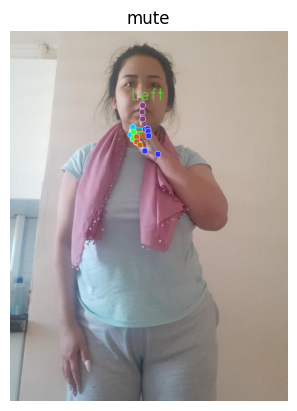

{'bboxes': [[0.16810129, 0.78975455, 0.13236671, 0.19417131], [0.41666614, 0.18111505, 0.1413608, 0.17471628]], 'user_id': '8cae201068904c1663263cc6d51bf2422088a13a17d79e0cfd4616896e73fc3d', 'labels': ['no_gesture', 'mute']}
[4, 0.5314213037490845, 0.33333736658096313, -7.586061201436678e-08, 0.48625147342681885, 0.32424044609069824, -0.0022827014327049255, 0.46524351835250854, 0.30565908551216125, -0.005809617228806019, 0.45003485679626465, 0.28839361667633057, -0.011416574940085411, 0.43868204951286316, 0.2749442458152771, -0.017848648130893707, 0.4867594838142395, 0.26509276032447815, -0.0015210759593173862, 0.47812604904174805, 0.23787644505500793, -0.010450790636241436, 0.4759645462036133, 0.21851058304309845, -0.018116449937224388, 0.4771667420864105, 0.20095989108085632, -0.025168685242533684, 0.49453645944595337, 0.2642427384853363, -0.007587821688503027, 0.4427224397659302, 0.26043522357940674, -0.021123521029949188, 0.43450719118118286, 0.27980464696884155, -0.023752365261316

In [17]:
# STEP 1: Create an HandLandmarker object.
options = HandLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=LANDMARKER_MODEL_PATH),
    running_mode=VisionRunningMode.IMAGE)

with HandLandmarker.create_from_options(options) as landmarker:
    label = random.choice(LABELS)       ######
    with open(os.path.join(ANNOTATIONS_DIR, f"{label}.json"), 'r') as file:
        annotations = json.load(file)
    
    image_name = random.choice(list(annotations.keys()))
    image_path = os.path.join(IMAGE_DATASET_DIR, label, f'{image_name}.jpg')
    mp_image = mp.Image.create_from_file(image_path)

    # STEP 3: Detect hand landmarks from the input image.
    hand_landmarker_result = landmarker.detect(mp_image)
    print(hand_landmarker_result)

    # Process the classification result. In this case, visualize it.
    annotated_image = draw_landmarks_on_image(mp_image.numpy_view(), hand_landmarker_result)

    # Display the image
    plt.imshow(annotated_image)
    plt.title(label)
    plt.axis('off')  # Hide the axes
    plt.show()

    print(annotations[image_name])

    # STEP 4: Write hand landmark into csv
    annotations_labels = annotations[image_name]['labels']
    annotations_bboxes = annotations[image_name]['bboxes']
    gesture_bboxes = annotations_bboxes[annotations_labels.index(label)]

    label_dict = {label: i for i, label in enumerate(LABELS)}
    for hand_landmarks in hand_landmarker_result.hand_landmarks:
        row = [label_dict[label]]                ############ 
        for landmark in hand_landmarks:
            if body_module.is_point_in_bbox(landmark.x, landmark.y, gesture_bboxes):
                row.extend([landmark.x, landmark.y, landmark.z])
            
        print(row)